<a href="https://colab.research.google.com/github/Arnav1511/automobile.analysis/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing drive library and mounting gdrive

In [23]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Mounting the dataset

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/kaggle_dataset'

In [24]:
%cd /content/gdrive/MyDrive/automobile

/content/gdrive/MyDrive/automobile


Listing all the contents

In [25]:
!ls


Automobile_data.csv


In [26]:
!pwd


/content/gdrive/MyDrive/automobile


Downloading dataset from Kaggle

In [ ]:
!kaggle datasets download -d wjia26/big-tech-companies-tweet-sentiment

401 - Unauthorized


In [ ]:
!ls

'Bigtech - 12-07-2020 till 19-09-2020'	     kaggle.json
'Bigtech - 20-09-2020 till 13-10-2020.csv'   Updated_tech_reviews
 big-tech-companies-tweet-sentiment.zip      Updated_tech_reviews.csv
 finalized_model.sav


Unzipping the dataset

In [ ]:
!unzip /content/gdrive/MyDrive/kaggle_dataset/big-tech-companies-tweet-sentiment.zip

Archive:  /content/gdrive/MyDrive/kaggle_dataset/big-tech-companies-tweet-sentiment.zip
replace Bigtech - 20-09-2020 till 13-10-2020.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls


 app.py
'Bigtech - 20-09-2020 till 13-10-2020.csv'
 big-tech-companies-tweet-sentiment.zip
 kaggle.json


Creating dataframe from the dataset

In [27]:
import pandas as pd
df=pd.read_csv("Automobile_data.csv")


In [28]:
df.shape

(205, 26)

In [29]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

Extract the reviews

In [30]:
tweet=df.text.values
print(tweet)

AttributeError: ignored

Tokenizing and removing stopwords

In [31]:
import nltk 
from nltk.tokenize import RegexpTokenizer #to remove punctuations and tokenize the text
from nltk.corpus import stopwords # to remove the stop words after tokenization
nltk.download('stopwords')
nltk.download('punkt')

#tokens_without_sw = [word for word in tweet if not word in stopwords.words()]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Cleaning the Text (emojis, mentions, hashtags, hyperlinks)

In [32]:
import re

emojis = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        "]+", flags=re.UNICODE)

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text) #Removed @mentions
  text = re.sub(r'#','',text) #Removing the #symbol
  text = re.sub(r'RT[\s]+','',text)  #Removing the RT
  text = re.sub(r'https?:\/\/\S+','',text) #Removing the hyperlinks
  text = emojis.sub(r'',text) #remove emojis

  return make


#Cleaning the text
df['text']=df['text'].apply(cleanTxt)

#Show the cleaned text
df.tail(12)


KeyError: ignored

In [ ]:
df=df.drop_duplicates(subset='text')

In [ ]:
df.tail(20)

,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1
266069,2020-10-04 00:00:03,Youtube,190,464,Youtube,NaN,0,Speedrunfrance,#Youtube,A new show about Speedrunning? speedrunning ...,1312542964837736448,SpeedRunFrance.fr,0.0000,Technology,Youtube
266070,2020-10-04 00:00:03,Youtube,190,464,Youtube,NaN,0,Speedrunfrance,#Youtube,First ever Shadow of the Colossus Any% Hard su...,1312542963692711942,SpeedRunFrance.fr,-0.1027,Technology,Youtube
266071,2020-10-04 00:00:00,Youtube,173,0,Youtube,"Chico, CA",1,CreatorHB,#Youtube,YouTube officially removed the Community Contr...,1312542953223659520,Creator Handbook,0.0000,Technology,Youtube
266072,2020-10-03 23:59:45,Youtube,441,3375,Youtube,United States,0,_communityshop_,#Youtube,SouthDakota Support the stream: Thank You !...,1312542891831709696,https://works-micro-office.freeforums.net,0.6696,Technology,Youtube
266073,2020-10-03 23:59:17,Youtube,563,131,Youtube,YouTube,2,SpecialGamesYT,#Youtube,Live Genshin Impact Battle-Pass CO-OP Deutsch...,1312542770851127296,SpecialGamesYT,0.0000,Technology,Youtube
266074,2020-10-03 23:58:36,Youtube,3,2,Youtube,NaN,0,sagetvng,#Youtube,AskTheProf COMINGSOON This is a talk show on ...,1312542602437242881,sagetvng,0.5267,Technology,Youtube
266075,2020-10-03 23:58:05,Youtube,10,30,Youtube,Youtube,0,YoungWheezy17,#Youtube,any minecraft youtubers wanna collab? pm me if...,1312542469842706432,Young Wheezy,0.4574,Technology,Youtube
266076,2020-10-03 23:58:01,Youtube,10,80,Youtube,NaN,0,saenz_colton,#Youtube,Among_us Livestream in 2 hours at 9pm central ...,1312542455623892992,Colton Saenz,0.0000,Technology,Youtube
266077,2020-10-03 23:57:52,Youtube,13,6,Youtube,Xantontown,1,18Redemption,#Youtube,• Follow me • ...,1312542415417487361,VIRAL 🌎🌍🌏,0.0000,Technology,Youtube
266078,2020-10-03 23:57:39,Youtube,578,833,Youtube,NaN,1,TheGamerzHaven,#Youtube,TheGamerzHaven is hosting Pathfinder with _Pho...,1312542362476961794,Kumo,0.0000,Technology,Youtube


Vectorizing the reviews

In [ ]:
from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#def getFilteredText(text):
#    text= cleanText(text);
#    return text

df['Subjectivity']=df['text'].apply(getSubjectivity)
df['NewPolarity']=df['text'].apply(getPolarity)
#df['CleanedText']=df['text'].apply(getFilteredText)

Generating the wordcloud after text filtering

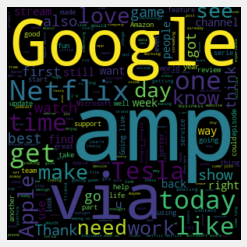

In [ ]:
#Plot a word cloud 
from wordcloud import WordCloud
import tweepy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

restricted=['YOUTUBE','SUBSCRIBE','CHECK','twitch','New', 'video','Follow','Comment']+stopwords.words('english')

allWords = ' '.join( [twts for twts in df['text']])
wordCloud = WordCloud( width = 300, height= 300, random_state = 21, max_font_size = 119, stopwords=restricted).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

Generating the analysis (Negative, Positive, Neutral)

In [ ]:
#Create a function to compute positive, negative or neutral text

def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'

df['Analysis']= df['NewPolarity'].apply(getAnalysis)


In [ ]:
df[['file_name', 'text', 'Subjectivity', 'NewPolarity','Analysis']].head(50)


,file_name,text,Subjectivity,NewPolarity,Analysis
0,Nvidia,NVIDIA GauGAN is actually a good tool to pract...,0.600000,0.700000,Positive
1,Nvidia,"BullSequana X2415, the first supercomputer bla...",0.277778,0.250000,Positive
2,Nvidia,I'm going to attend GTC 2020 tonight! Excited....,0.750000,0.375000,Positive
3,Nvidia,NVIDIA delays launch of GeForce RTX 3070 until...,0.000000,0.000000,Neutral
6,Nvidia,"Today, don’t miss the World’s largest AI confe...",0.000000,0.000000,Neutral
9,Nvidia,NVIDIA GeForce RTX 30 Series – Top Facts &amp;...,0.633333,0.033333,Positive
10,Nvidia,In a bizarre twist to this already highly co...,0.550649,0.090909,Positive
11,Nvidia,PhotoModeMonday MAN'S ROAD ☁️ TheWitche...,0.000000,0.000000,Neutral
12,Nvidia,Hardware Utilization of VividSparks Products. ...,0.000000,0.000000,Neutral
13,Nvidia,Some news: The nvidia RTX 3070 has been delaye...,0.625000,0.437500,Positive


In [ ]:
df.reset_index(drop=True, inplace=True)
df.tail(100)

,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1,Subjectivity,NewPolarity,Analysis
219829,2020-10-04 00:26:50,Youtube,3338,2348,Youtube,"Washington, USA",0,CardHunting,#Youtube,Episode 3 of the new daily upload!!! The Golf...,1312549704022913024,Justintime509 Gaming SC,0.0000,Technology,Youtube,0.207071,0.101010,Positive
219830,2020-10-04 00:26:15,Youtube,650,366,Youtube,Thailand,0,IBasskung,#Youtube,New Course Coming Soon! ‍ iBasskung Academy...,1312549559654989824,iBasskung,0.3595,Technology,Youtube,0.454545,0.170455,Positive
219831,2020-10-04 00:25:26,Youtube,10,42,Youtube,16GiG channel,0,JamesJakkaphong,#Youtube,16GiG Channels NintendoSwitch DBZF animalcross...,1312549354767409153,16GiG Channel,0.0000,Technology,Youtube,0.000000,0.000000,Neutral
219832,2020-10-04 00:25:05,Youtube,40,913,Youtube,NaN,0,tubelooper,#Youtube,Check this thing out now! Awesome Jimi Hendrix...,1312549264229269504,tubelooper,0.7163,Technology,Youtube,1.000000,1.000000,Positive
219833,2020-10-04 00:24:56,Youtube,5231,451,Youtube,NaN,0,YFCsports,#Youtube,NFL Week 4 . via NFL PrizePicks DFS Footb...,1312549226749087744,Your Fielder's Choice,0.0000,Technology,Youtube,0.800000,0.400000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219924,2020-10-03 23:55:24,Youtube,561,881,Youtube,NaN,0,crystalmonay21,#Youtube,‼️NEW VIDEO‼️ Films inspired by Jodorowskys Du...,1312541794404573186,Those 2! REACTS On YT 💕😁,0.5411,Technology,Youtube,0.000000,0.000000,Neutral
219925,2020-10-03 23:55:16,Youtube,42410,33958,Youtube,England.,1,themerry_monk,#Youtube,"You already know that you help many people, da...",1312541762662084608,Gerry McCann,0.9062,Technology,Youtube,0.364935,0.305195,Positive
219926,2020-10-03 23:54:59,Youtube,176,9,Youtube,NaN,0,asian_view,#Youtube,New vlog arrivals! Discover a lovely culture t...,1312541692046667777,Asian View,0.9167,Technology,Youtube,0.401515,0.223485,Positive
219927,2020-10-03 23:54:54,Youtube,308,567,Youtube,London UK,1,Kaiu24,#Youtube,New Video is up. Finally showing my new Stream...,1312541667703033858,Kaiu24,0.3182,Technology,Youtube,0.621818,-0.005455,Negative


Plotting the Subjectivity vs Polarity graph for first 1500 reviews

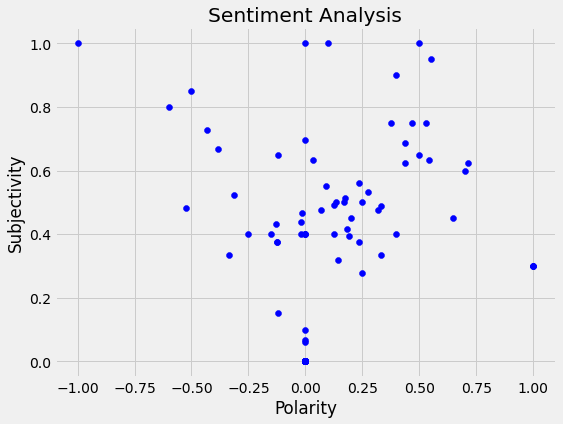

In [ ]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, 100):
  plt.scatter(df['NewPolarity'][i], df['Subjectivity'][i], color='Blue')
  plt.title('Sentiment Analysis')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
  
plt.show()


In [ ]:
df.shape[0]

219929

Plotting the Subjectivity vs Polarity graph for Nvidia throughout the dataframe

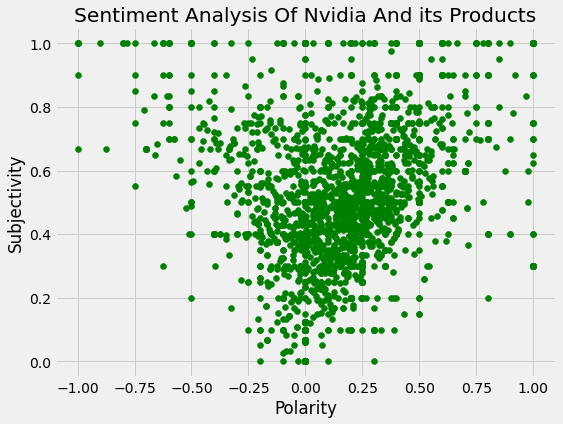

In [ ]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  if (df['file_name'][i]=='Nvidia'):
        plt.scatter(df['NewPolarity'][i], df['Subjectivity'][i], color='Green')

  plt.title('Sentiment Analysis Of Nvidia And its Products')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
plt.show()

Plotting the Subjectivity vs Polarity graph for Twitch throughout the dataframe

In [ ]:
#Get the percentage of Positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['text']

round(  (ptweets.shape[0] / df.shape[0]) *100, 1)

52.3

In [ ]:
nvidia = ptweets[df.file_name=='Nvidia']
ms = ptweets[df.file_name=='Microsoft']
amd = ptweets[df.file_name=='AMD']
amazon = ptweets[df.file_name=='Amazon']
twitch = ptweets[df.file_name=='Twitch']
apple = ptweets[df.file_name=='Apple']
youtube = ptweets[df.file_name=='Youtube']
tesla = ptweets[df.file_name=='Tesla']
google = ptweets[df.file_name=='Google']
netflix = ptweets[df.file_name=='Netflix']



print("Positive reviews regarding Nvidia and its products: "+str(round(  (nvidia.shape[0] / ptweets.shape[0]) *100,1))+"%")
print("Positive reviews regarding Microsoft and its products: "+str(round(  (ms.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding AMD and its products: "+str(round(  (amd.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Amazon and its products: "+str(round(  (amazon.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Twitch and its products: "+str(round(  (twitch.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Apple and its products: "+str(round(  (apple.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Youtube and its products: "+str(round(  (youtube.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Tesla and its products: "+str(round(  (tesla.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Google and its products: "+str(round(  (google.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Netflix and its products: "+str(round(  (netflix.shape[0] / ptweets.shape[0]) *100, 1))+"%")


Positive reviews regarding Nvidia and its products: 1.5%
Positive reviews regarding Microsoft and its products: 9.5%
Positive reviews regarding AMD and its products: 1.3%
Positive reviews regarding Amazon and its products: 8.8%
Positive reviews regarding Twitch and its products: 17.4%
Positive reviews regarding Apple and its products: 12.5%
Positive reviews regarding Youtube and its products: 14.7%
Positive reviews regarding Tesla and its products: 7.1%
Positive reviews regarding Google and its products: 11.5%
Positive reviews regarding Netflix and its products: 15.7%


In [ ]:
#Get the percentage of Negative tweets
ntweets=df[df.Analysis == 'Negative']
ntweets = ntweets['text']
round(  (ntweets.shape[0] / df.shape[0]) *100, 1)

13.2

In [ ]:
nvidiant = ntweets[df.file_name=='Nvidia']
msnt = ntweets[df.file_name=='Microsoft']
amdnt = ntweets[df.file_name=='AMD']
amazonnt = ntweets[df.file_name=='Amazon']
twitchnt = ntweets[df.file_name=='Twitch']
applent = ntweets[df.file_name=='Apple']
youtubent = ntweets[df.file_name=='Youtube']
teslant = ntweets[df.file_name=='Tesla']
googlent = ntweets[df.file_name=='Google']
netflixnt = ntweets[df.file_name=='Netflix']

print("Negative reviews regarding Nvidia and its products: "+str(round(  (nvidiant.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Microsoft and its products: "+str(round(  (msnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding AMD and its products: "+str(round(  (amdnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Amazon and its products: "+str(round(  (amazonnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Twitch and its products: "+str(round(  (twitchnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Apple and its products: "+str(round(  (applent.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Youtube and its products: "+str(round(  (youtubent.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Tesla and its products: "+str(round(  (teslant.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Google and its products: "+str(round(  (googlent.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Netflix and its products: "+str(round(  (netflixnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")


Negative reviews regarding Nvidia and its products: 1.8%
Negative reviews regarding Microsoft and its products: 9.7%
Negative reviews regarding AMD and its products: 0.9%
Negative reviews regarding Amazon and its products: 7.2%
Negative reviews regarding Twitch and its products: 17.5%
Negative reviews regarding Apple and its products: 13.0%
Negative reviews regarding Youtube and its products: 13.5%
Negative reviews regarding Tesla and its products: 8.3%
Negative reviews regarding Google and its products: 9.8%
Negative reviews regarding Netflix and its products: 18.3%


In [ ]:
#Get the percentage of Neutral tweets
netweets=df[df.Analysis == 'Neutral']
netweets = netweets['text']
round(  (netweets.shape[0] / df.shape[0]) *100, 1)

34.4

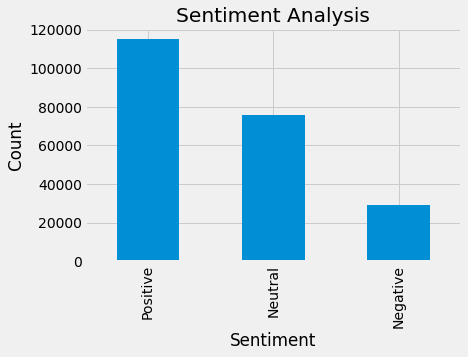

In [ ]:
#Show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
#amd.value_counts().plot(kind='bar')


plt.show()


In [ ]:
#positive reviews variables
p_nvidia=round((nvidia.shape[0] / ptweets.shape[0])*100,1)
p_ms=round((ms.shape[0] / ptweets.shape[0])*100,1)
p_amd=round((amd.shape[0] / ptweets.shape[0])*100,1)
p_amz=round((amazon.shape[0] / ptweets.shape[0])*100,1)
p_twitch=round((twitch.shape[0] / ptweets.shape[0])*100,1)
p_apple=round((apple.shape[0] / ptweets.shape[0])*100,1)
p_ytube=round((youtube.shape[0] / ptweets.shape[0])*100,1)
p_tesla=round((tesla.shape[0] / ptweets.shape[0])*100,1)
p_google=round((netflix.shape[0] / ptweets.shape[0])*100,1)
p_netflix=round((netflix.shape[0] / ptweets.shape[0])*100,1)

#negative reviews variables
n_nvidia=round((nvidiant.shape[0] / ntweets.shape[0])*100,1)
n_ms=round((msnt.shape[0] / ntweets.shape[0])*100,1)
n_amd=round((amdnt.shape[0] / ntweets.shape[0])*100,1)
n_amz=round((amazonnt.shape[0] / ntweets.shape[0])*100,1)
n_twitch=round((twitchnt.shape[0] / ntweets.shape[0])*100,1)
n_apple=round((applent.shape[0] / ntweets.shape[0])*100,1)
n_ytube=round((youtubent.shape[0] / ntweets.shape[0])*100,1)
n_tesla=round((teslant.shape[0] / ntweets.shape[0])*100,1)
n_google=round((netflixnt.shape[0] / ntweets.shape[0])*100,1)
n_netflix=round((netflixnt.shape[0] / ntweets.shape[0])*100,1)

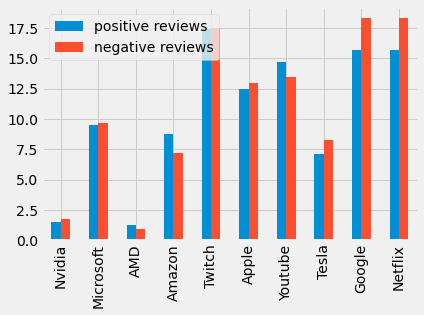

In [ ]:
plotdata = pd.DataFrame({
    "positive reviews":[p_nvidia,p_ms,p_amd,p_amz,p_twitch,p_apple,p_ytube,p_tesla,p_google,p_netflix],
    "negative reviews":[n_nvidia,n_ms,n_amd,n_amz,n_twitch,n_apple,n_ytube,n_tesla,n_google,n_netflix]
    }, 
    index=["Nvidia","Microsoft","AMD","Amazon","Twitch","Apple", "Youtube","Tesla","Google","Netflix"]
)

plotdata.plot(kind="bar")

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.svm import SVR

x = df['text'].head(500)
y = df['NewPolarity'].head(500)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=42)

# array1=np.array(x)
# array2=np.array(y)

# array1=array1.reshape(-1,1)
# array2=array2.reshape(-1,1)

# y=y.astype('float')
# print(array1)
# print(array2)

In [ ]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer

#Vectorize text reviews to numbers

vec = CountVectorizer(stop_words='english')
vec.fit(x,y)

vectorizer=vec.transform(x)
print(vectorizer.toarray())
x = vec.fit_transform(x).toarray()

x_test = vec.transform(x_test).toarray()
y=y.astype('float')
x=x.astype('float')
print(x_test)
#print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression


model = MultinomialNB()
model.fit(x,y)

MultinomialNB()

In [ ]:
from sklearn.linear_model import LinearRegression

lireg=LinearRegression() # initialize the model
lireg.fit(x,y) # fit the model
vector=vec.transform(["Amazon is the best in the world"])
y_pred=lireg.predict(vector) # now predict
print(y_pred)
# Taking out the accuracy 

#model.score(x,y)
lireg.score(x,y)

[0.43251676]


1.0

In [ ]:
review1="Amazon is worst company"
review2="I like Google Pixel"
review3="Microsoft is the best place to work"
review4="I dont like being with Salesforce"
vactorize=vec.transform([review1,review2,review3,review4])
print(vactorize)
prediction=lireg.predict(vactorize)
print(prediction)

  (0, 264)	1
  (0, 637)	1
  (0, 3044)	1
  (1, 1280)	1
  (1, 1638)	1
  (2, 410)	1
  (2, 1762)	1
  (2, 2066)	1
  (2, 3034)	1
  (3, 909)	1
  (3, 1638)	1
[0.01341091 0.01169406 0.12985583 0.00661825]


In [ ]:
############Intsall 
#+streamlit
#+pyngrok
#+nohub/background

In [ ]:
!pip install streamlit


In [ ]:
!pip install pyngrok


In [ ]:
!pip install --upgrade streamlit

In [ ]:
%%writefile app.py
import streamlit as st

PAGE_CONFIG = {"page_title":"StColab.io","page_icon":":smiley:","layout":"centered"}
st.set_page_config(**PAGE_CONFIG)

def main():
  st.title("Awesome Streamlit for my bootyful models")
  st.subheader("How to run streamlit from colab")

  menu = ["Home","About"]
  choice = st.sidebar.selectbox('Menu',menu)
  if choice == 'Home':
    st.subheader("Streamlit From Colab")


  if __name__=='__main__':
    main()


Overwriting app.py


In [ ]:
from pyngrok import ngrok





In [ ]:
!streamlit run app.py&>/dev/null&

In [ ]:
!pgrep streamlit

1943


In [ ]:

publ_url = ngrok.connect(port='80')
print(publ_url)

NgrokTunnel: "http://aeb1-104-199-68-117.ngrok.io" -> "http://localhost:80"


In [ ]:
!kill 1902

In [ ]:
#Code completed with 99% accuracy, thankyou for watching...